<a href="https://colab.research.google.com/github/aryelmedeiros/artifical_inteligence-/blob/main/Lista_U2/IA_Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTÃO 1 


Importando as bibliotecas necessarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

A) $f_(x_1,x_2) = (1 - x_1)^2 + 100 (x_2 -x_1^2)^2 $

In [2]:
def f(x1,x2):
  r = (1-x1)**2 + 100*(x2-x1**2)**2
  return r 

Plotar a superficie da Função

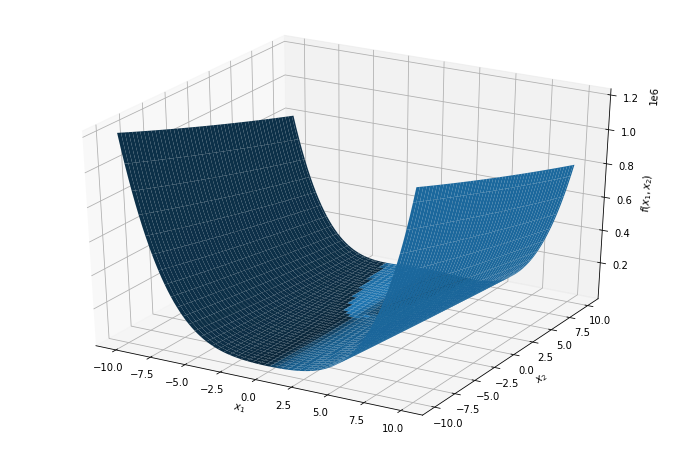

In [3]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = f(x1, x2)

ax.plot_surface(x1, x2, z)
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.3, 
    random_state=36
)

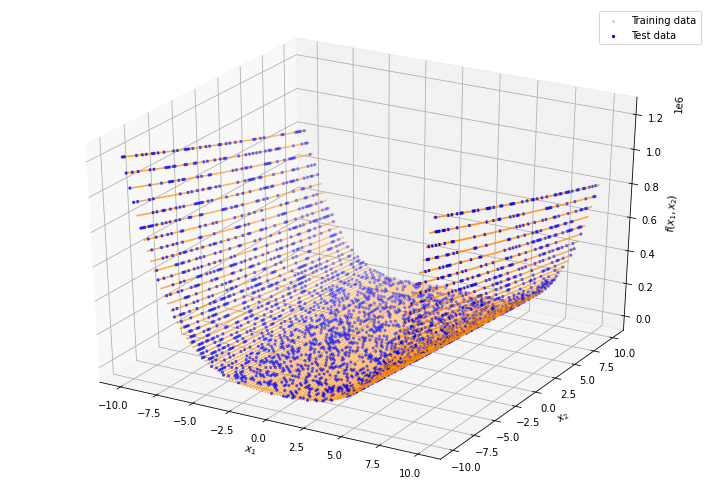

In [5]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='blue', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

Modelando a MLP 

In [6]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainabl

Treinando a MLP

In [8]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=200,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/200
788/788 [==============================] - 1s 1ms/step - loss: 6355216.5000 - val_loss: 6525846.0000 - lr: 1.0000e-04
Epoch 2/200
788/788 [==============================] - 1s 2ms/step - loss: 6230631.0000 - val_loss: 6200835.5000 - lr: 1.0000e-04
Epoch 3/200
788/788 [==============================] - 1s 2ms/step - loss: 6061654.0000 - val_loss: 5715982.0000 - lr: 1.0000e-04
Epoch 4/200
788/788 [==============================] - 1s 2ms/step - loss: 5877896.0000 - val_loss: 5539400.0000 - lr: 1.0000e-04
Epoch 5/200
788/788 [==============================] - 1s 1ms/step - loss: 5717043.5000 - val_loss: 6710863.0000 - lr: 1.0000e-04
Epoch 6/200
788/788 [==============================] - 1s 2ms/step - loss: 5612905.5000 - val_loss: 5467584.5000 - lr: 1.0000e-04
Epoch 7/200
788/788 [==============================] - 1s 2ms/step - loss: 5587641.0000 - val_loss: 5167479.5000 - lr: 1.0000e-04
Epoch 8/200
788/788 [==============================] - 1s 2ms/step - loss: 5233814.0000 - 

Plotando a fig 

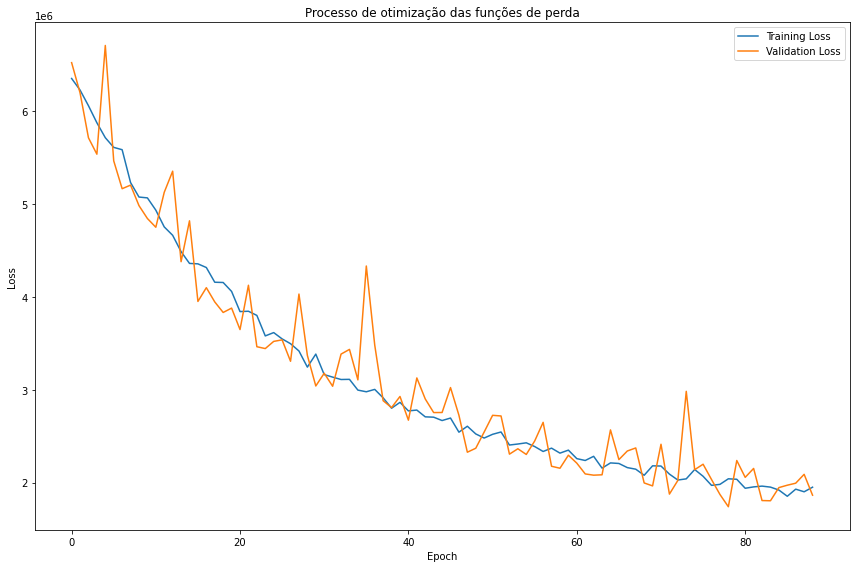

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

94/94 [==============================] - 0s 840us/step


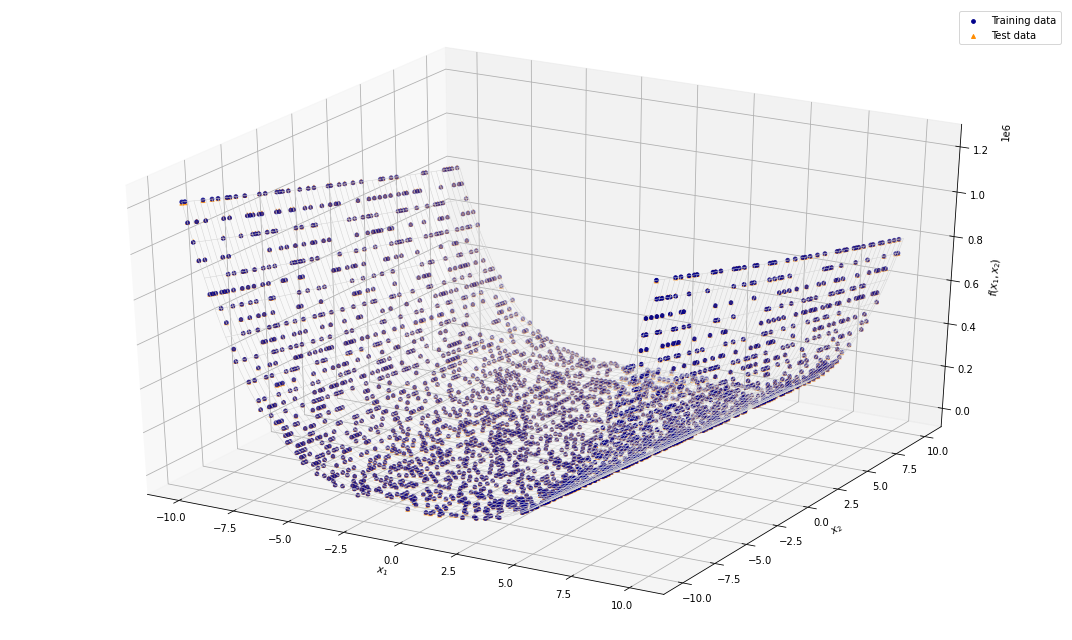

In [10]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

y_pred = mlp.predict(x_test)

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='darkblue', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_pred, s=15, marker='^', color='darkorange', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

B)$f(x) = x_1^2+x_2^2+2x_1 x_2cos(πx_1x_2) + x_1+ x_2 -1  $